### Importing the basic libraries 

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#### Importing the training dataset
train_data =pd.read_csv(r'C:\Users\DELL\Downloads\Project-Housing_splitted\train.csv')
pd.set_option('display.max_columns', None)
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
5,1197,60,RL,58.0,14054,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,219210
6,561,20,RL,NaN,11341,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,NaN,NaN,NaN,0,5,2010,WD,Normal,121500
7,1041,20,RL,88.0,13125,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,1,2006,WD,Normal,155000
8,503,20,RL,70.0,9170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1965.0,Unf,2,461,Fa,Fa,Y,0,0,184,0,0,0,NaN,GdPrv,Shed,400,4,2007,WD,Normal,140000
9,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,Gas

In [3]:
### Checking the dataset size
train_data.shape

(1168, 81)

In [4]:
### Cheking the null values 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

### Dropping the column which have null values more than 80% becasue if I will fill these null values, these column might mislead the model accuracy.

In [5]:
train_data.drop(columns=['MiscFeature','PoolQC','Alley','Id'], inplace=True)

In [6]:
### Filling the null values with simpleimputer.
from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy='most_frequent')
train_data['MasVnrType']=si.fit_transform(train_data[['MasVnrType']])
train_data['BsmtQual']=si.fit_transform(train_data[['BsmtQual']])
train_data['MasVnrType']=si.fit_transform(train_data[['MasVnrType']])
train_data['BsmtCond']=si.fit_transform(train_data[['BsmtCond']])
train_data['BsmtExposure']=si.fit_transform(train_data[['BsmtExposure']])
train_data['BsmtFinType1']=si.fit_transform(train_data[['BsmtFinType1']])
train_data['BsmtFinType2']=si.fit_transform(train_data[['BsmtFinType2']])
train_data['Fireplaces']=si.fit_transform(train_data[['Fireplaces']])
train_data['FireplaceQu']=si.fit_transform(train_data[['FireplaceQu']])
train_data['GarageType']=si.fit_transform(train_data[['GarageType']])
train_data['GarageFinish']=si.fit_transform(train_data[['GarageFinish']])
train_data['GarageQual']=si.fit_transform(train_data[['GarageQual']])
train_data['GarageCond']=si.fit_transform(train_data[['GarageCond']])
train_data['Fence']=si.fit_transform(train_data[['Fence']])

In [7]:
si= SimpleImputer(strategy='mean')
train_data['LotFrontage']=si.fit_transform(train_data[['LotFrontage']])
train_data['GarageYrBlt']=si.fit_transform(train_data[['GarageYrBlt']])
train_data['MasVnrArea']=si.fit_transform(train_data[['MasVnrArea']])

In [8]:
### Re-Check the null values is filled or not
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   Utilities      1168 non-null   object 
 8   LotConfig      1168 non-null   object 
 9   LandSlope      1168 non-null   object 
 10  Neighborhood   1168 non-null   object 
 11  Condition1     1168 non-null   object 
 12  Condition2     1168 non-null   object 
 13  BldgType       1168 non-null   object 
 14  HouseStyle     1168 non-null   object 
 15  OverallQual    1168 non-null   int64  
 16  OverallCond    1168 non-null   int64  
 17  YearBuilt      1168 non-null   int64  
 18  YearRemo

In [9]:
train_data.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,MnPrv,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,MnPrv,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,MnPrv,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,MnPrv,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,MnPrv,0,6,2009,WD,Normal,215000
5,60,RL,58.00000,14054,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,879,879,GasA,Ex,Y,SBrkr,879,984,0,1863,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2006.0,Fin,3,660,TA,TA,Y,100,17,0,0,0,0,MnPrv,0,11,2006,New,Partial,219210
6,20,RL,70.98847,11341,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1957,1996,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,Gd,TA,No,ALQ,1302,Unf,0,90,1392,GasA,TA,Y,SBrkr,1392,0,0,1392,1,0,1,1,3,1,TA,5,Mod,1,Gd,Detchd,1957.0,Unf,2,528,TA,TA,Y,0,0,0,0,95,0,MnPrv,0,5,2010,WD,Normal,121500
7,20,RL,88.00000,13125,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1957,2000,Gable,CompShg,Wd Sdng,Wd Sdng,BrkCmn,67.0,TA,TA,CBlock,TA,TA,No,Rec,168,BLQ,682,284,1134,GasA,Ex,Y,SBrkr,1803,0,0,1803,1,0,2,0,3,1,TA,8,Maj1,1,TA,Attchd,1957.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,GdPrv,0,1,2006,WD,Normal,155000
8,20,RL,70.00000,9170,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,1Story,5,7,1965,1965,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,698,GLQ,96,420,1214,GasA,Ex,Y,SBrkr,1214,0,0,1214,1,0,1,0,2,1,TA,6,Typ,0,Gd,Detchd,1965.0,Unf,2,461,Fa,Fa,Y,0,0,184,0,0,0,GdPrv,400,4,2007,WD,Normal,140000
9,50,RL,80.00000,8480,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,GasA,TA,Y,SBrkr,832,384,0,1216,0,0,1,0,2,1,TA,6,Typ,0,Gd,Detchd,1947.0,Unf,1,336,TA,TA,Y,158,0,102,0,0,0,MnPrv,0,10,2008,COD,Abnorml

### The null values is filled and data is ready for EDA.

## EDA

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [11]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

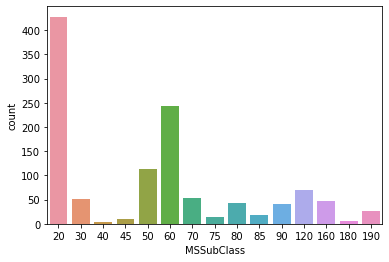

In [12]:
sns.countplot("MSSubClass", data=train_data)

### 1 story house has more sales comparison to other.

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

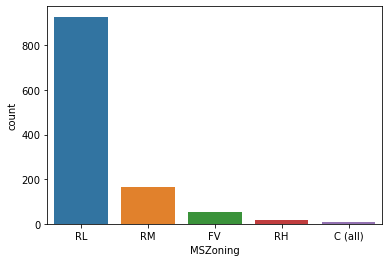

In [13]:
sns.countplot("MSZoning", data=train_data)

### Customer more preffered residential low density area

<AxesSubplot:xlabel='Street', ylabel='count'>

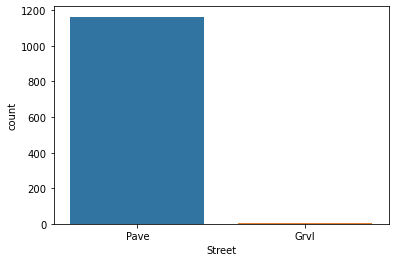

In [14]:
sns.countplot("Street", data=train_data)

### Customers more preffered Pave type street. 

<AxesSubplot:xlabel='LotShape', ylabel='count'>

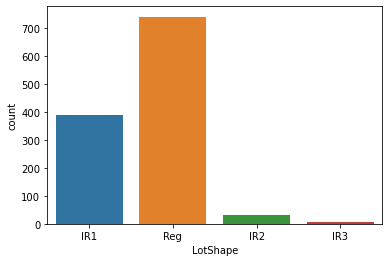

In [15]:
sns.countplot("LotShape", data=train_data)

### Customers more preffered regular type of property.

<AxesSubplot:xlabel='LandContour', ylabel='count'>

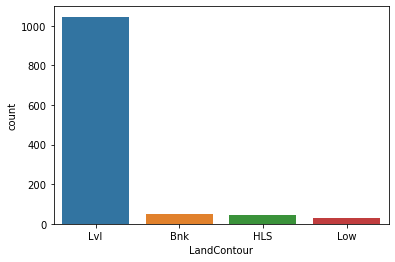

In [16]:
sns.countplot("LandContour", data=train_data)

### Customers more preffered level land for flat

<AxesSubplot:xlabel='Utilities', ylabel='count'>

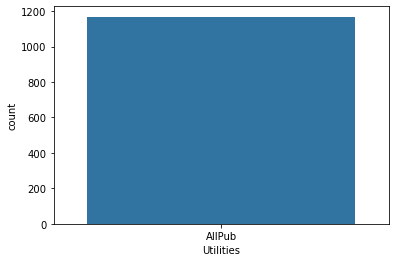

In [17]:
sns.countplot("Utilities", data=train_data)

### As the utility has same for all the customers.It will put same effort to all the price. So, I will drop this column.

In [18]:
train_data.drop(columns='Utilities', inplace=True)

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

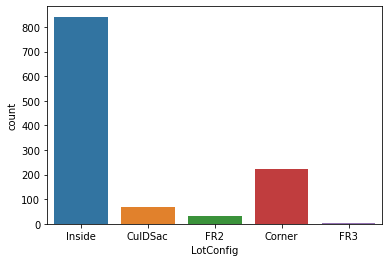

In [19]:
sns.countplot("LotConfig", data=train_data)

### Customers more preffered inside lot configuration

<AxesSubplot:xlabel='LandSlope', ylabel='count'>

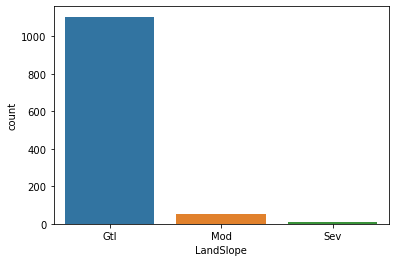

In [20]:
sns.countplot("LandSlope", data=train_data)

### Customers more preffered gentle slope for the property

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

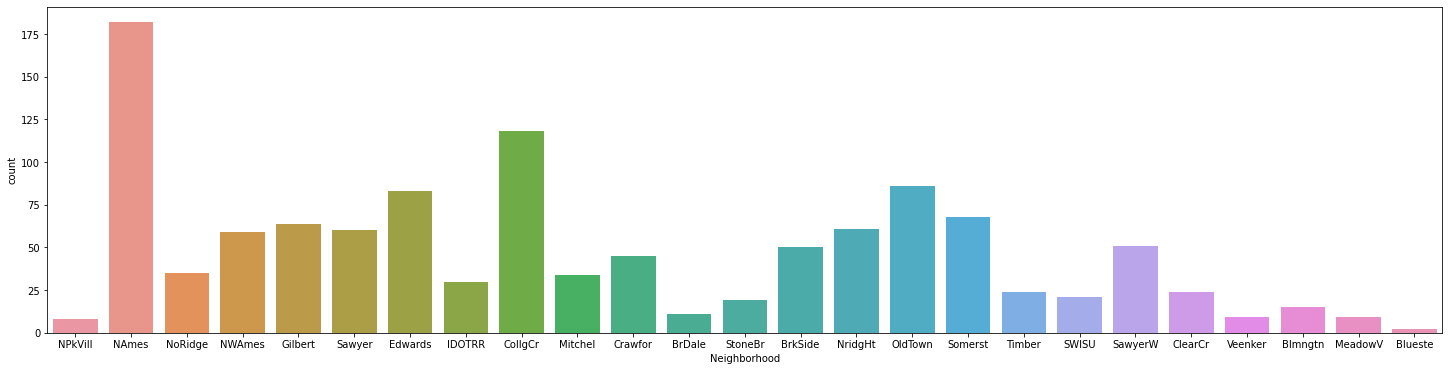

In [21]:
plt.figure(figsize=(25,6))
sns.countplot("Neighborhood", data=train_data)

### The customer more preffered neighbor is College Creek and North Ames, rest of neighbor also have good customers.

<AxesSubplot:xlabel='Condition1', ylabel='count'>

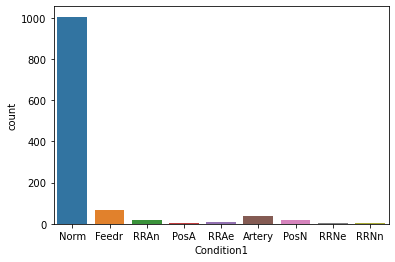

In [22]:
sns.countplot("Condition1", data=train_data)

### Most of the customers like the normal conditions.

<AxesSubplot:xlabel='Condition2', ylabel='count'>

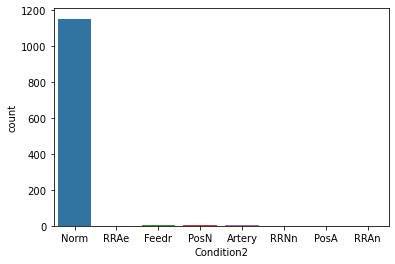

In [23]:
sns.countplot("Condition2", data=train_data)

### Most of the customers like the normal conditions.

<AxesSubplot:xlabel='BldgType', ylabel='count'>

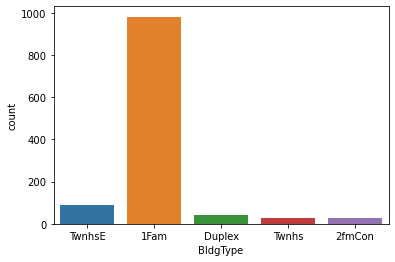

In [24]:
sns.countplot("BldgType", data=train_data)

### Most of the customers like single family detached dwelling.

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

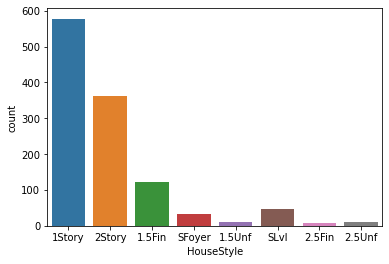

In [25]:
sns.countplot("HouseStyle", data=train_data)

### Most of the customers like 1st and 2 story dwelling. 

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

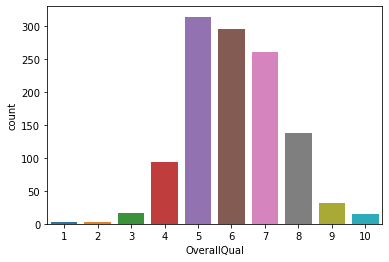

In [26]:
sns.countplot("OverallQual", data=train_data)

### Customers feedback for material is more going to Average and above Average.

<AxesSubplot:xlabel='OverallCond', ylabel='count'>

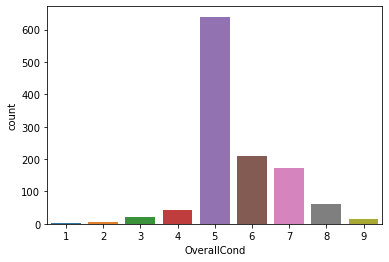

In [27]:
sns.countplot("OverallCond", data=train_data)

### Customers feedback for overall house is more going to Average and above Average.

<AxesSubplot:xlabel='RoofStyle', ylabel='count'>

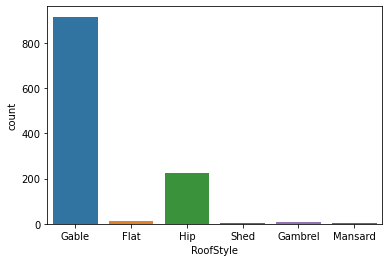

In [28]:
sns.countplot("RoofStyle", data=train_data)

### Most of the customer preffered Gabble and hip style roof.

<AxesSubplot:xlabel='RoofMatl', ylabel='count'>

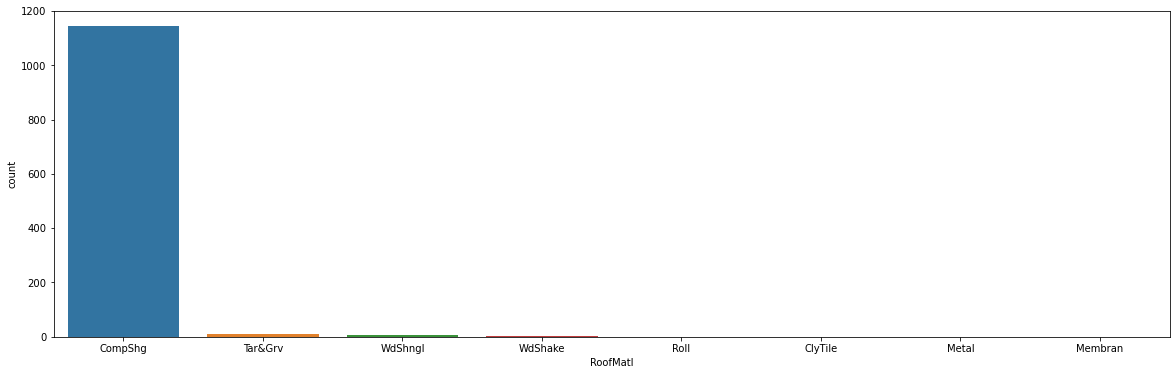

In [29]:
plt.figure(figsize=(20,6))
sns.countplot("RoofMatl", data=train_data)

### Most of the customers preffered standarad roof material.

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

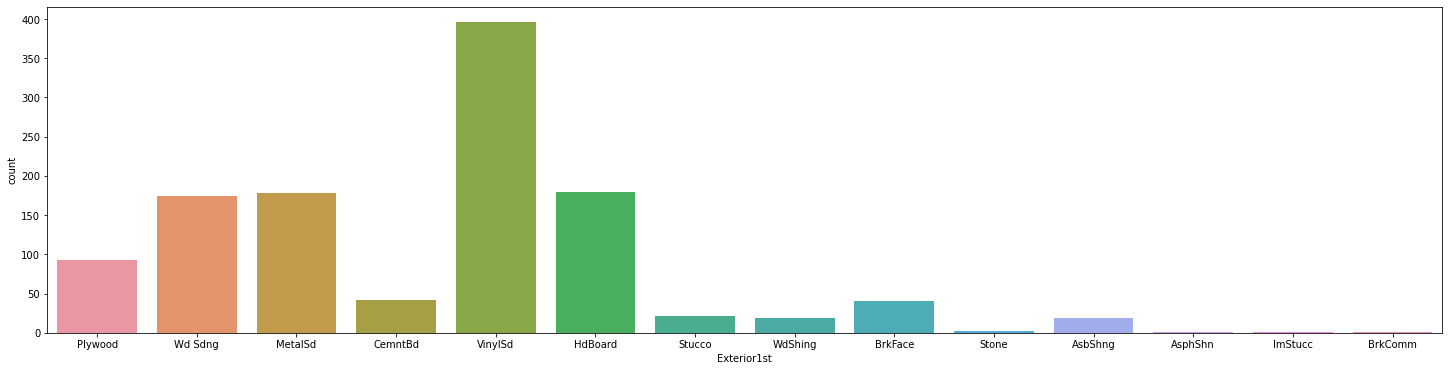

In [30]:
plt.figure(figsize=(25,6))
sns.countplot("Exterior1st", data=train_data)

### vinay sliding and hard board type exterior are in demand compare to other.

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

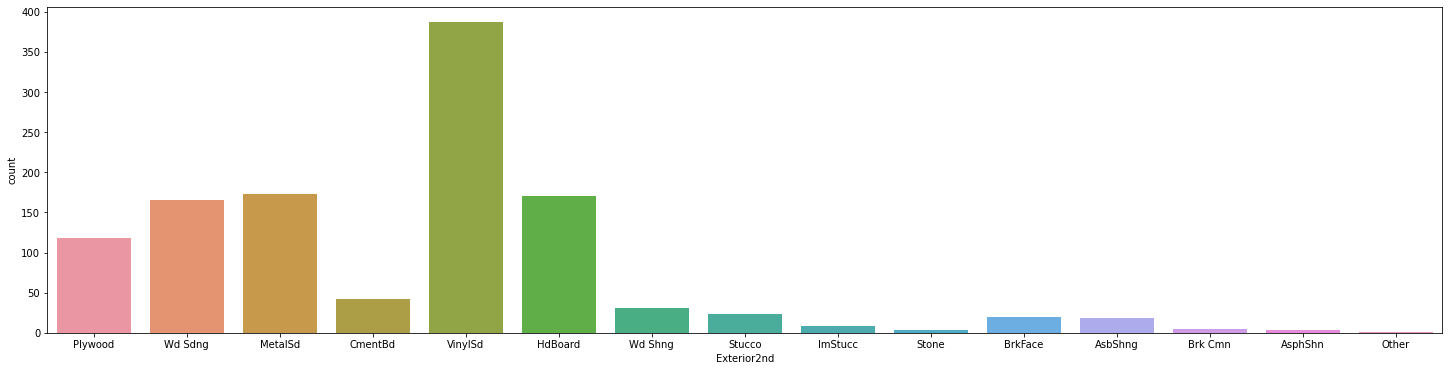

In [31]:
plt.figure(figsize=(25,6))
sns.countplot("Exterior2nd", data=train_data)

### vinay sliding and hard board type exterior are in demand compare to other.

<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

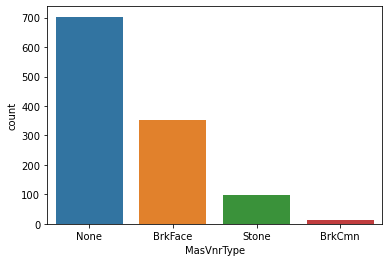

In [32]:
sns.countplot("MasVnrType", data=train_data)

<AxesSubplot:xlabel='ExterQual', ylabel='count'>

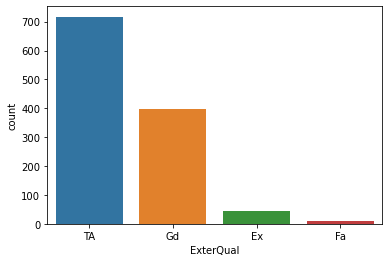

In [33]:
sns.countplot("ExterQual", data=train_data)

### Exterior quality has more trend for Average and good 

<AxesSubplot:xlabel='ExterCond', ylabel='count'>

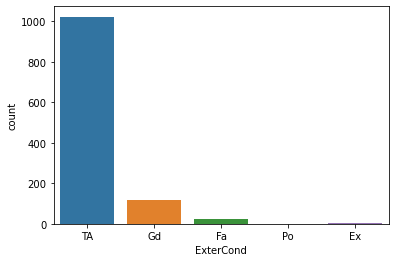

In [34]:
sns.countplot("ExterCond", data=train_data)

### Exterior quality has more trend for Average and good 

<AxesSubplot:xlabel='Foundation', ylabel='count'>

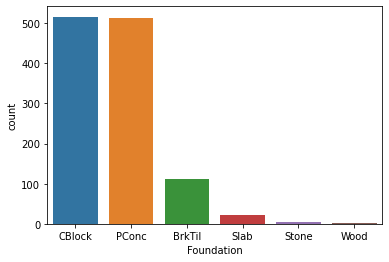

In [35]:
sns.countplot("Foundation", data=train_data)

### Foundation with cinder block and poured concrete has more trend compared to the other items.

<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

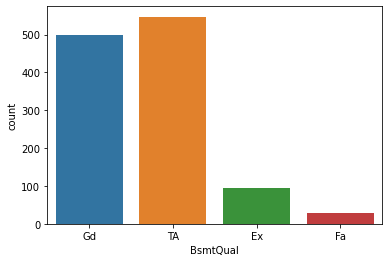

In [36]:
sns.countplot("BsmtQual", data=train_data)

### Height of basement has more vote for good and Average.

<AxesSubplot:xlabel='BsmtCond', ylabel='count'>

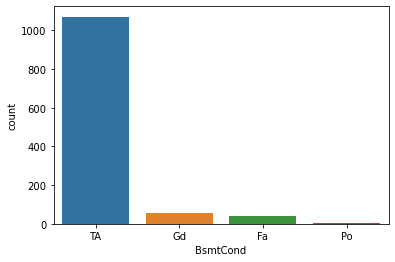

In [37]:
sns.countplot("BsmtCond", data=train_data)

### General condition of basement has more trend for good and Average.

<AxesSubplot:xlabel='BsmtExposure', ylabel='count'>

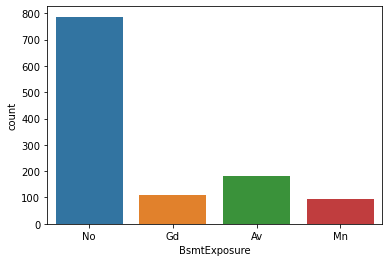

In [38]:
sns.countplot("BsmtExposure", data=train_data)

### No exposure has good rating for walkout area. 

<AxesSubplot:xlabel='BsmtFinType1', ylabel='count'>

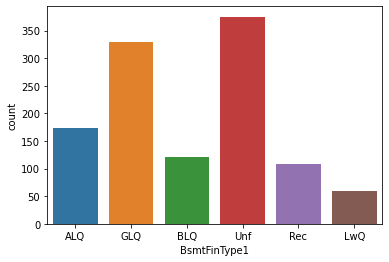

In [39]:
sns.countplot("BsmtFinType1", data=train_data)

### Unfinished and good living quarter has good rating for basement. 

<AxesSubplot:xlabel='BsmtFinType2', ylabel='count'>

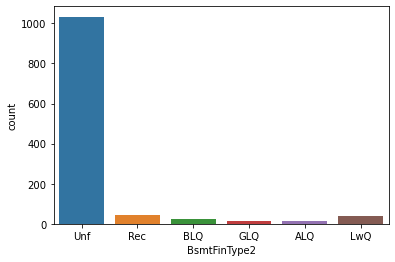

In [40]:
sns.countplot("BsmtFinType2", data=train_data)

### Unfinished has good rating for finished basement. 

<AxesSubplot:xlabel='Heating', ylabel='count'>

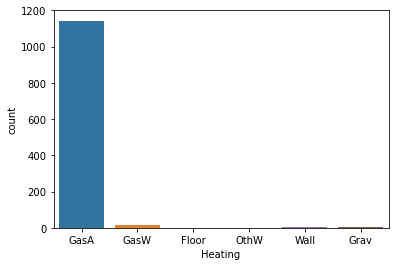

In [41]:
sns.countplot("Heating", data=train_data)

### Gas forced air furnace good rating or I can say GasA is the only choise.

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

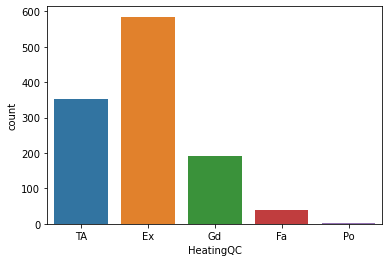

In [42]:
sns.countplot("HeatingQC", data=train_data)

### Excellent rating has good trend for heating quality.

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

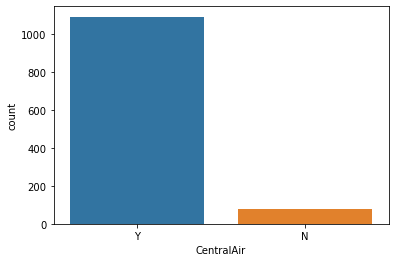

In [43]:
sns.countplot("CentralAir", data=train_data)

### Central air has more rating for yes.

<AxesSubplot:xlabel='Electrical', ylabel='count'>

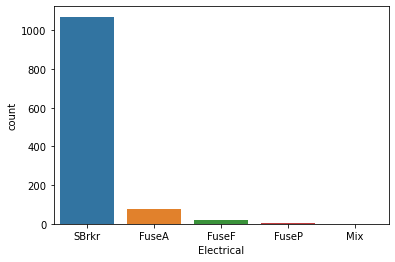

In [44]:
sns.countplot("Electrical", data=train_data)

### Standard circuit breaker has good rating for electrical system

<AxesSubplot:xlabel='KitchenQual', ylabel='count'>

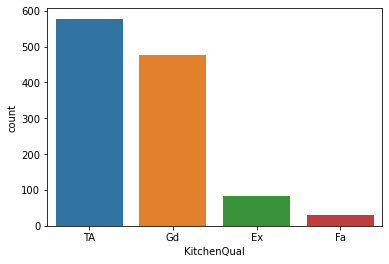

In [45]:
sns.countplot("KitchenQual", data=train_data)

### Average and good has good rating for kitchen.

<AxesSubplot:xlabel='Functional', ylabel='count'>

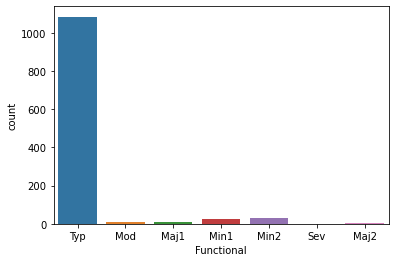

In [46]:
sns.countplot("Functional", data=train_data)

### Typical functionality has more rating for fuctional.

<AxesSubplot:xlabel='FireplaceQu', ylabel='count'>

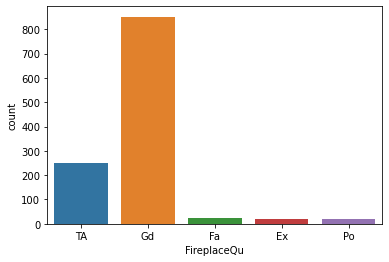

In [47]:
sns.countplot("FireplaceQu", data=train_data)

### Good qulity has more rating for fireplace. 

<AxesSubplot:xlabel='GarageType', ylabel='count'>

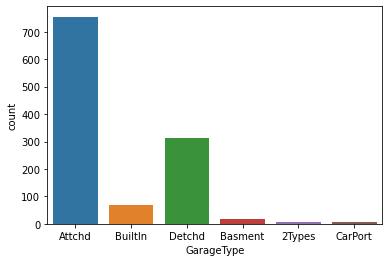

In [48]:
sns.countplot("GarageType", data=train_data)

### Attached garage has more rating for garage type compared to other type garage.

<AxesSubplot:xlabel='GarageFinish', ylabel='count'>

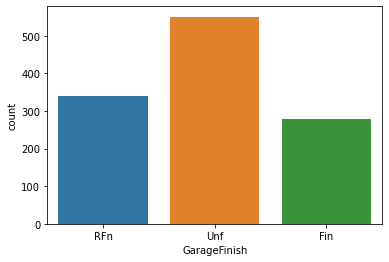

In [49]:
sns.countplot("GarageFinish", data=train_data)

### Unfurnished garage has more rating for garage finish

<AxesSubplot:xlabel='GarageQual', ylabel='count'>

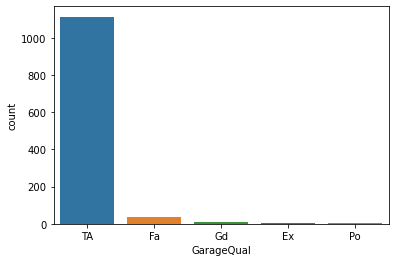

In [50]:
sns.countplot("GarageQual", data=train_data)

### Average quality has good rating for Garage

<AxesSubplot:xlabel='GarageCond', ylabel='count'>

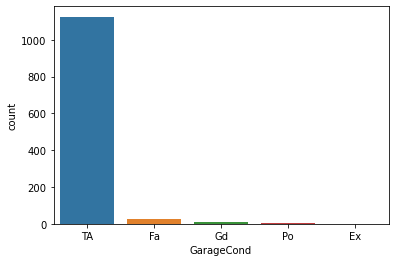

In [51]:
sns.countplot("GarageCond", data=train_data)

### Average condition has good rating for Garage

<AxesSubplot:xlabel='PavedDrive', ylabel='count'>

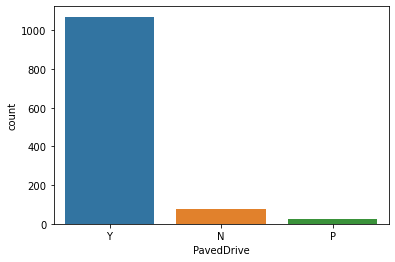

In [52]:
sns.countplot("PavedDrive", data=train_data)

### Paved drive way has good rating for pavedrive

<AxesSubplot:xlabel='Fence', ylabel='count'>

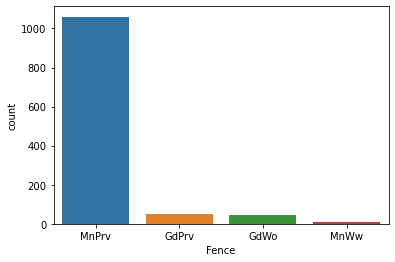

In [53]:
sns.countplot("Fence", data=train_data)

### Minimum privacy fencing has good rating for fence.

<AxesSubplot:xlabel='SaleType', ylabel='count'>

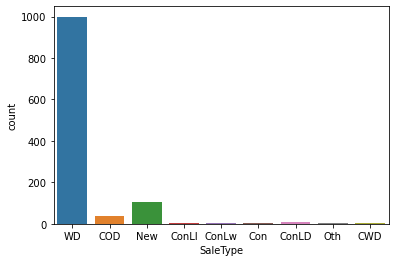

In [54]:
sns.countplot("SaleType", data=train_data)

### Warrenty Deed has good rating for saletype

<AxesSubplot:xlabel='SaleCondition', ylabel='count'>

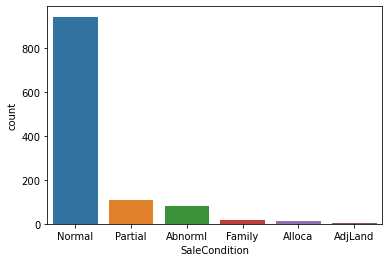

In [55]:
sns.countplot("SaleCondition", data=train_data)

### Normal condition has good rating for sales.

### Now going to plot the scatter plot but as the column numbers are too high I will plot scatter in 4 parts.

## Scatter plot

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   LotShape       1168 non-null   object 
 6   LandContour    1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyl

In [57]:
#### Changing the Categorical valuse with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
col=['MSSubClass','MSZoning','Street','LotShape', 'LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence', 'SaleType','SaleCondition','YrSold','YearRemodAdd','YearBuilt']
train_data[col]= train_data[col].apply(le.fit_transform)
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,11,3,70.98847,4928,1,0,3,4,0,13,2,2,4,2,6,5,75,26,1,1,8,9,2,0.0,3,4,1,2,3,3,0,120,5,0,958,1078,1,4,1,4,958,0,0,958,0,0,2,0,2,1,3,5,6,1,4,1,1977.0,1,2,440,4,4,2,0,205,0,0,0,0,2,0,2,1,8,4,128000
1,0,3,95.00000,15865,1,0,3,4,1,12,2,2,0,2,8,6,69,20,0,5,12,13,2,0.0,2,2,2,3,1,1,0,351,4,823,1043,2217,1,0,1,4,2217,0,0,2217,1,0,2,0,4,1,2,8,6,1,4,1,1970.0,2,2,621,4,4,2,81,207,0,0,224,0,2,0,10,1,8,4,268000
2,5,3,92.00000,9920,1,0,3,1,0,15,2,2,0,5,7,5,95,47,1,1,7,7,2,0.0,2,4,2,2,3,0,2,862,5,0,255,1117,1,0,1,4,1127,886,0,2013,1,0,2,1,3,1,3,8,6,1,4,1,1997.0,2,2,455,4,4,2,180,130,0,0,0,0,2,0,6,1,8,4,269790
3,0,3,105.00000,11751,1,0,3,4,0,14,2,2,0,2,6,6,76,27,3,1,8,9,1,480.0,3,4,1,2,3,3,1,705,5,0,1139,1844,1,0,1,4,1844,0,0,1844,0,0,2,0,3,1,3,7,6,1,4,1,1977.0,1,2,546,4,4,2,0,122,0,0,0,0,2,0,1,4,0,4,190000
4,0,3,70.98847,16635,1,0,3,2,0,14,2,2,0,2,6,7,76,50,1,1,4,4,3,126.0,2,4,1,2,3,3,0,1246,5,0,356,1602,1,2,1,4,1602,0,0,1602,0,1,2,0,3,1,2,8,6,1,4,1,1977.0,0,2,529,4,4,2,240,0,0,0,0,0,2,0,6,3,8,4,215000


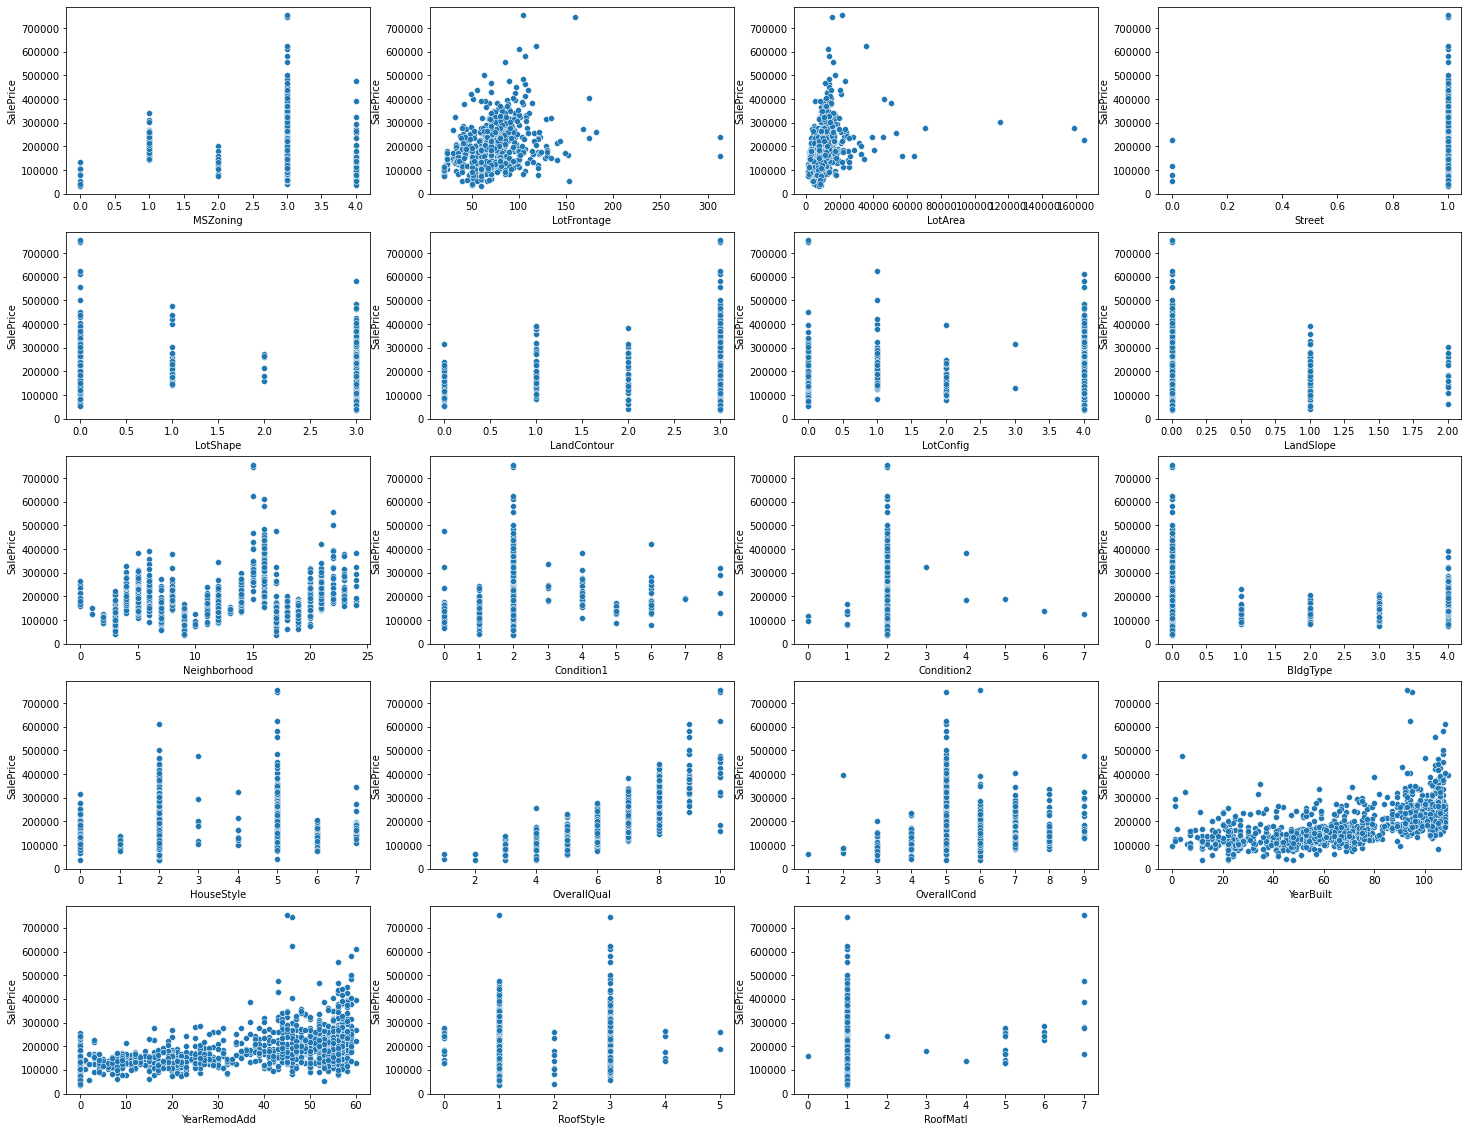

In [58]:
x=train_data.drop(columns='SalePrice')
y=train_data['SalePrice']
plt.figure(figsize=(25,20))
pn=1
for i in x.iloc[:,1:20]:
        if pn <= 20:
            plt.subplot(5,4,pn)
            sns.scatterplot(x[i],y)
            plt.xlabel(i, fontsize=10)
        pn+=1
plt.show()

### Conclusion - All the featrue has good trend with salesprice. 

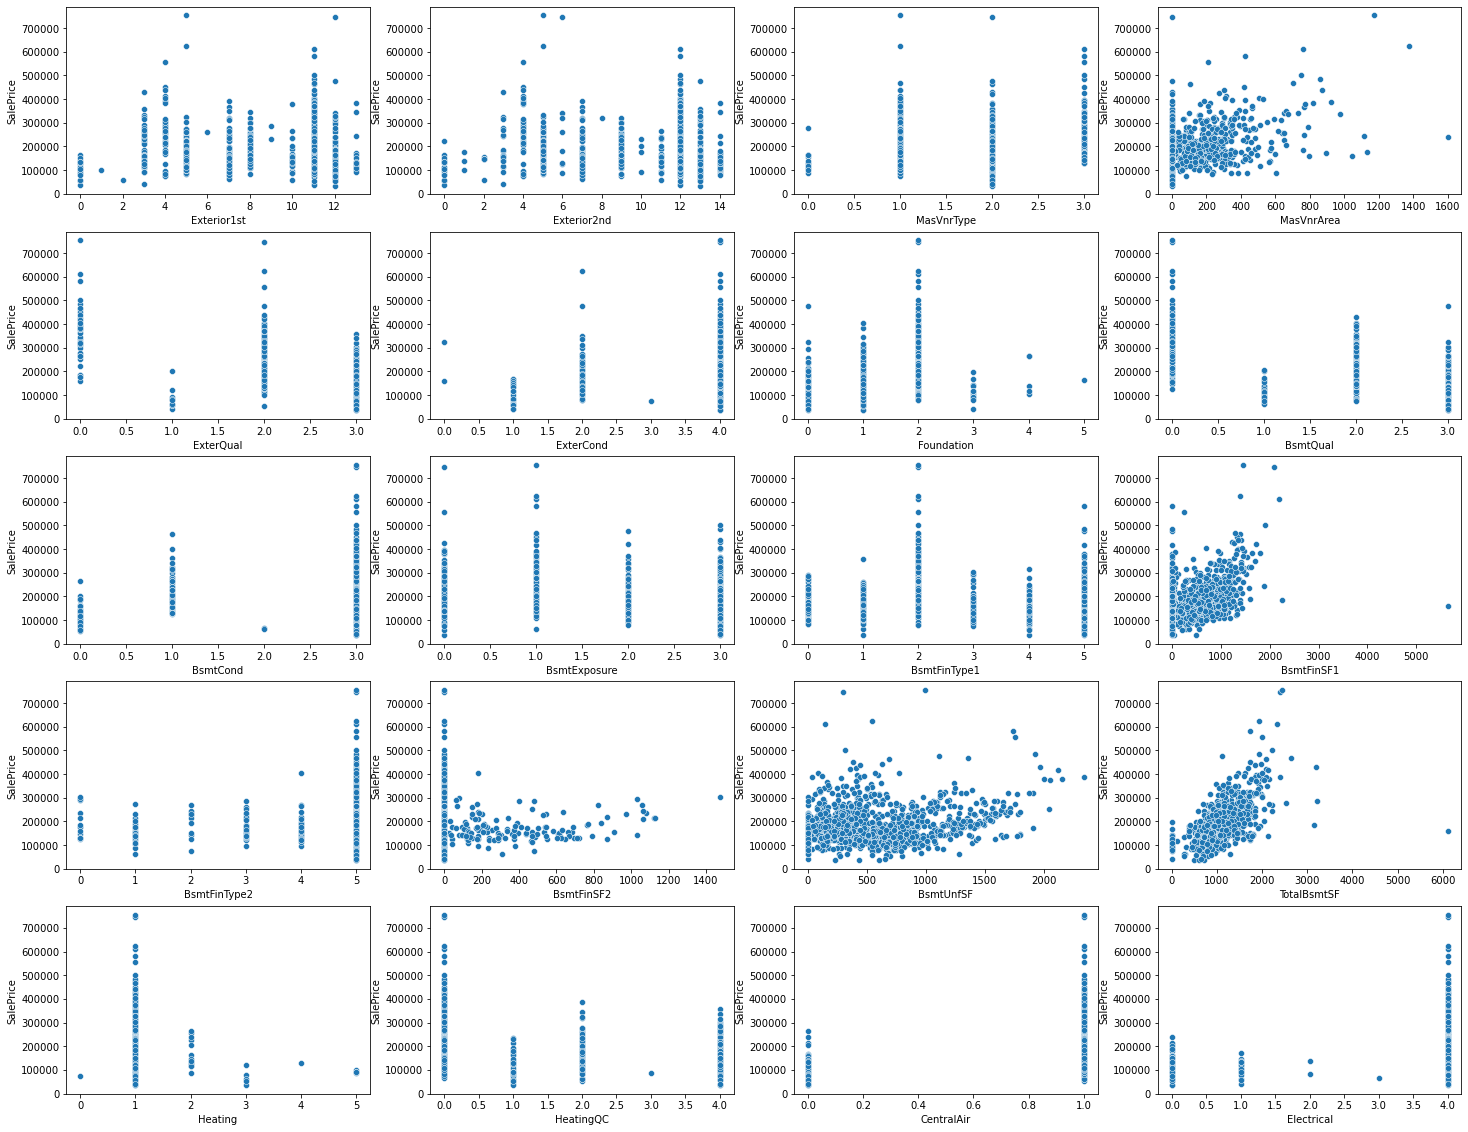

In [59]:
plt.figure(figsize=(25,20))
pn=1
for i in x.iloc[:,20:40]:
        if pn <= 20:
            plt.subplot(5,4,pn)
            sns.scatterplot(x[i],y)
            plt.xlabel(i, fontsize=10)
        pn+=1
plt.show()

### Conclusion - All the featrue has good trend with salesprice.

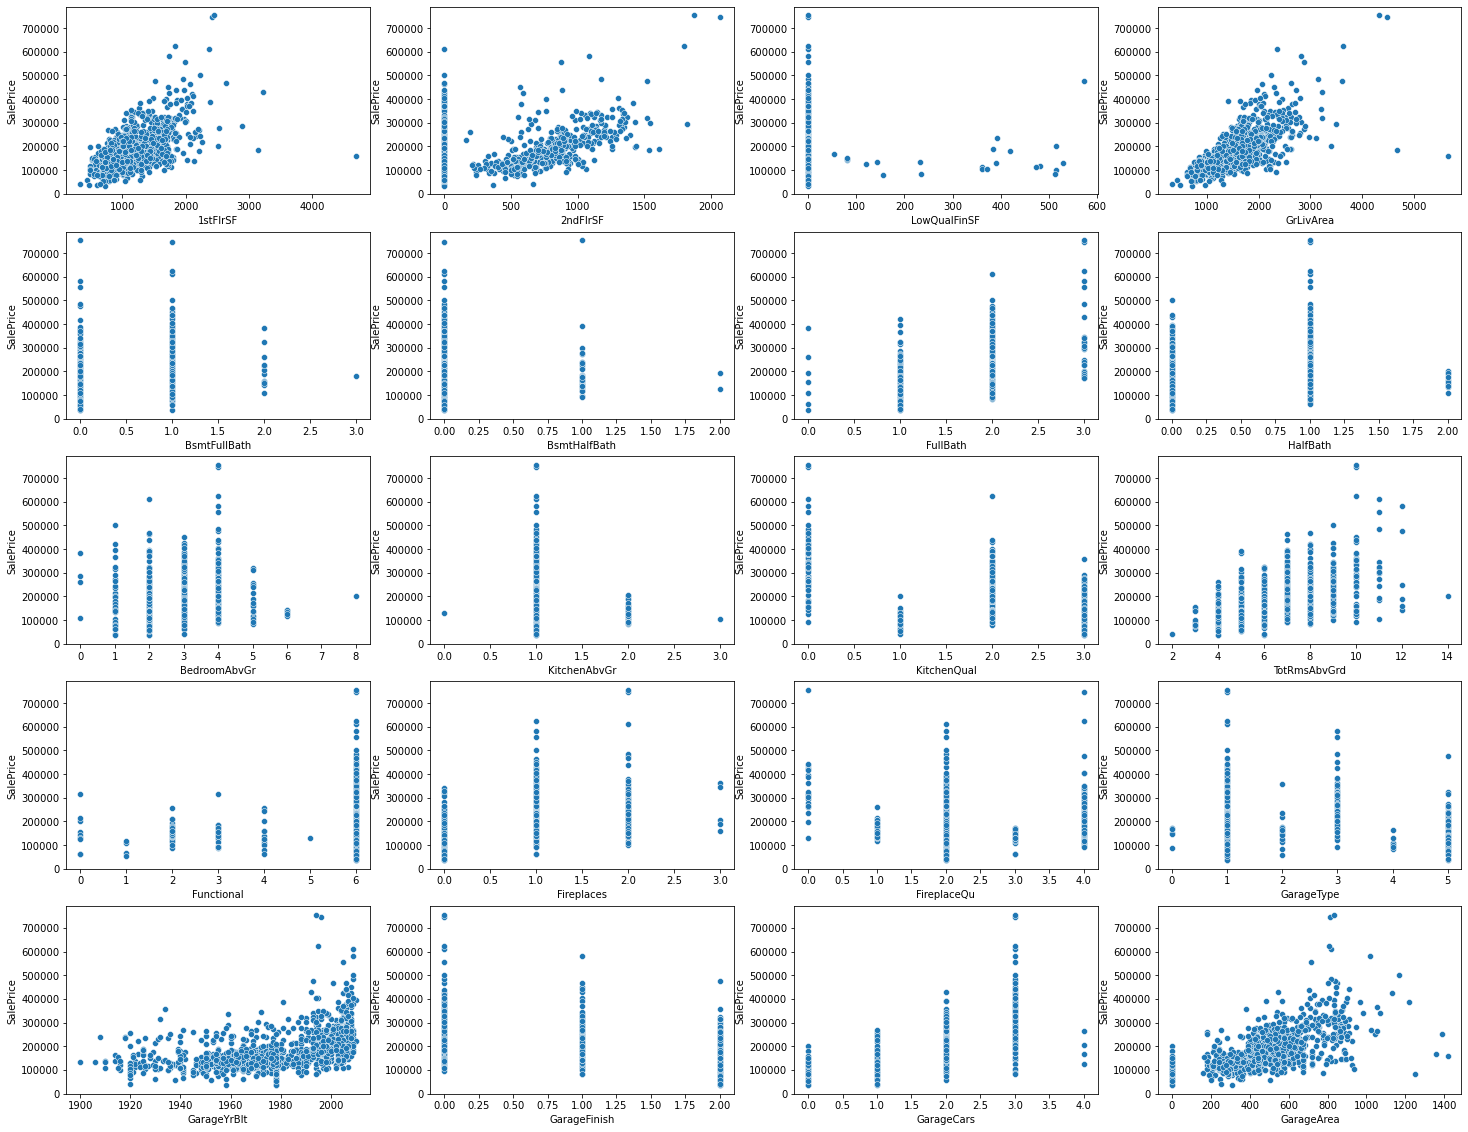

In [60]:
plt.figure(figsize=(25,20))
pn=1
for i in x.iloc[:,40:60]:
        if pn <= 20:
            plt.subplot(5,4,pn)
            sns.scatterplot(x[i],y)
            plt.xlabel(i, fontsize=10)
        pn+=1
plt.show()

### Conclusion - All the featrue has good trend with salesprice.

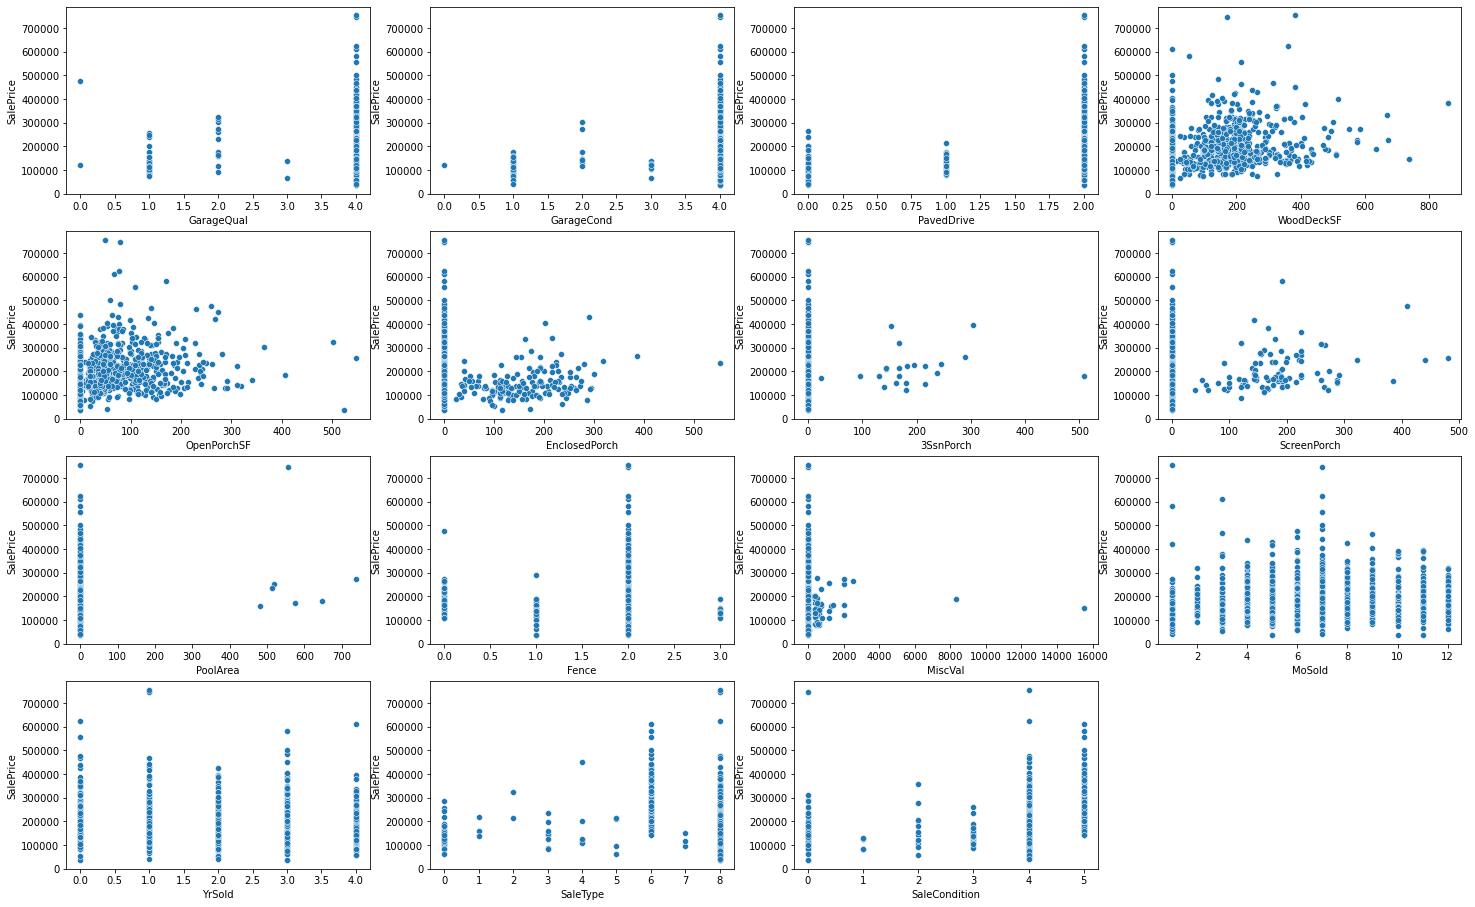

In [61]:
plt.figure(figsize=(25,20))
pn=1
for i in x.iloc[:,60:80]:
        if pn <= 20:
            plt.subplot(5,4,pn)
            sns.scatterplot(x[i],y)
            plt.xlabel(i, fontsize=10)
        pn+=1
plt.show()

### Conclusion - All the featrue has good trend with salesprice.

## Heatmap for checking the multicolinearity

<function matplotlib.pyplot.show(close=None, block=None)>

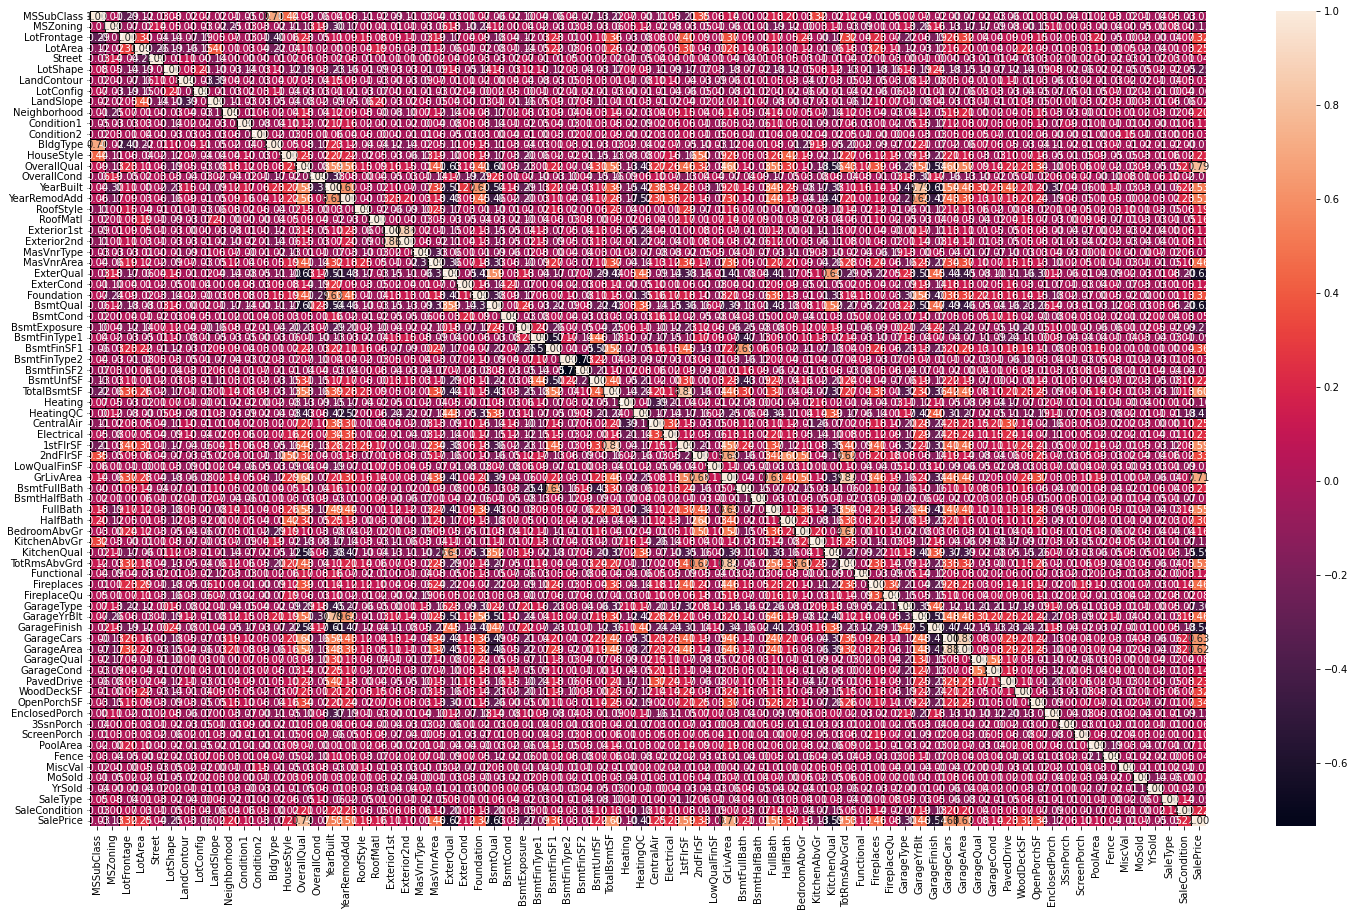

In [62]:
plt.figure(figsize=(25,15))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='black')
plt.show

In [63]:
### The number of feature is more I will check impact of the feature to the target.
corelation_matrix=train_data.corr()
corelation_matrix['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
                  ...   
HeatingQC      -0.406604
GarageFinish   -0.537121
KitchenQual    -0.592468
ExterQual      -0.624820
BsmtQual       -0.626850
Name: SalePrice, Length: 76, dtype: float64

### Conclusion - Many feature has multicolinearity with each other but not more than 90%. I can drop some feature but I can not do this becasue every feature has different impact to the target which is SalesPrice.

### Feature with maximum relation with target - OverallQual(78%)
### Feature with minimum relation with target - BsmtQual(-62%)

### There are many column which has to each other but not more than 90% and also every feature has unique relation with target which is SalePrice. So, I will proceed with all columns.

## Checking the value distribution

<function matplotlib.pyplot.show(close=None, block=None)>

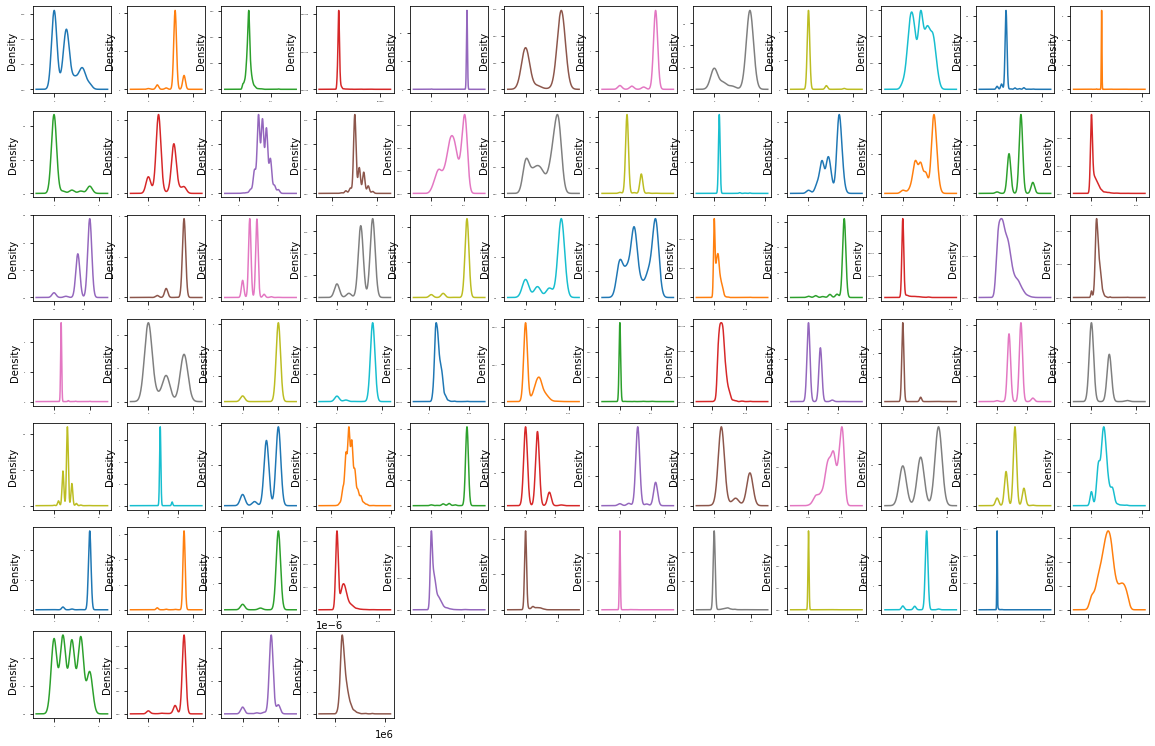

In [64]:
train_data.plot(kind='density', subplots=True, figsize=(20,15), layout = (8,12), fontsize =2, sharex=False, legend= False)
plt.show

### Most of the value is categorical values but some feature has continuous value and these show normal distriution with some skewness. I will check skewness and deal with skewness accodingly

In [65]:
train_data.iloc[:,0:60].skew()

MSSubClass       0.657253
MSZoning        -1.796785
LotFrontage      2.710383
LotArea         10.659285
Street         -17.021969
LotShape        -0.603775
LandContour     -3.125982
LotConfig       -1.118821
LandSlope        4.812568
Neighborhood     0.043735
Condition1       3.008289
Condition2      11.514458
BldgType         2.318657
HouseStyle       0.285680
OverallQual      0.175082
OverallCond      0.580714
YearBuilt       -0.448970
YearRemodAdd    -0.495864
RoofStyle        1.498560
RoofMatl         7.577352
Exterior1st     -0.612816
Exterior2nd     -0.592349
MasVnrType      -0.104609
MasVnrArea       2.834658
ExterQual       -1.810843
ExterCond       -2.516219
Foundation      -0.002761
BsmtQual        -1.343781
BsmtCond        -3.293554
BsmtExposure    -1.166987
BsmtFinType1    -0.068901
BsmtFinSF1       1.871606
BsmtFinType2    -3.615783
BsmtFinSF2       4.365829
BsmtUnfSF        0.909057
TotalBsmtSF      1.744591
Heating         10.103609
HeatingQC        0.449933
CentralAir  

In [66]:
train_data.iloc[:,60:80].skew()

GarageQual       -4.582386
GarageCond       -5.422472
PavedDrive       -3.274035
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
Fence            -3.185107
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SaleType         -3.660513
SaleCondition    -2.671829
SalePrice         1.953878
dtype: float64

### There are more feature which has skewness. I will remove the skewness with power transform.

In [67]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)
x=pd.DataFrame(x_new, columns=x.columns)

In [68]:
x.iloc[:,0:40].skew()

MSSubClass      -0.080627
MSZoning         0.233113
LotFrontage      0.161368
LotArea          0.032509
Street         -17.021969
LotShape        -0.594207
LandContour     -2.592303
LotConfig       -1.030401
LandSlope        3.954345
Neighborhood    -0.146541
Condition1       0.225468
Condition2       0.537277
BldgType         1.857194
HouseStyle      -0.080331
OverallQual      0.021658
OverallCond      0.048063
YearBuilt       -0.306003
YearRemodAdd    -0.626352
RoofStyle       -0.292233
RoofMatl        -6.314987
Exterior1st     -0.338023
Exterior2nd     -0.352793
MasVnrType      -0.016203
MasVnrArea       0.416370
ExterQual       -0.605112
ExterCond       -2.270791
Foundation       0.004296
BsmtQual        -0.413999
BsmtCond        -3.025865
BsmtExposure    -0.914214
BsmtFinType1    -0.206639
BsmtFinSF1      -0.404528
BsmtFinType2    -2.420885
BsmtFinSF2       2.394737
BsmtUnfSF       -0.284390
TotalBsmtSF      0.286779
Heating         -4.541694
HeatingQC        0.156511
CentralAir  

In [69]:
x.iloc[:,40:80].skew()

1stFlrSF         -0.002391
2ndFlrSF          0.280208
LowQualFinSF      6.922843
GrLivArea        -0.000054
BsmtFullBath      0.365488
BsmtHalfBath      3.954345
FullBath         -0.045944
HalfBath          0.498003
BedroomAbvGr      0.116498
KitchenAbvGr     -2.370593
KitchenQual      -0.435558
TotRmsAbvGrd      0.002332
Functional       -3.343664
Fireplaces        0.084950
FireplaceQu       0.082653
GarageType        0.222501
GarageYrBlt      -0.132523
GarageFinish     -0.335248
GarageCars       -0.022970
GarageArea       -0.320370
GarageQual       -4.327379
GarageCond       -4.925781
PavedDrive       -3.025809
WoodDeckSF        0.113026
OpenPorchSF      -0.002749
EnclosedPorch     2.022616
3SsnPorch         7.087955
ScreenPorch       3.067153
PoolArea         12.817372
Fence             1.116688
MiscVal           4.991071
MoSold           -0.035838
YrSold           -0.138185
SaleType         -2.067563
SaleCondition    -0.353292
dtype: float64

### Column which have continuous data with skewness. I removed the skewness of these columns. 

## Checking the Outliers

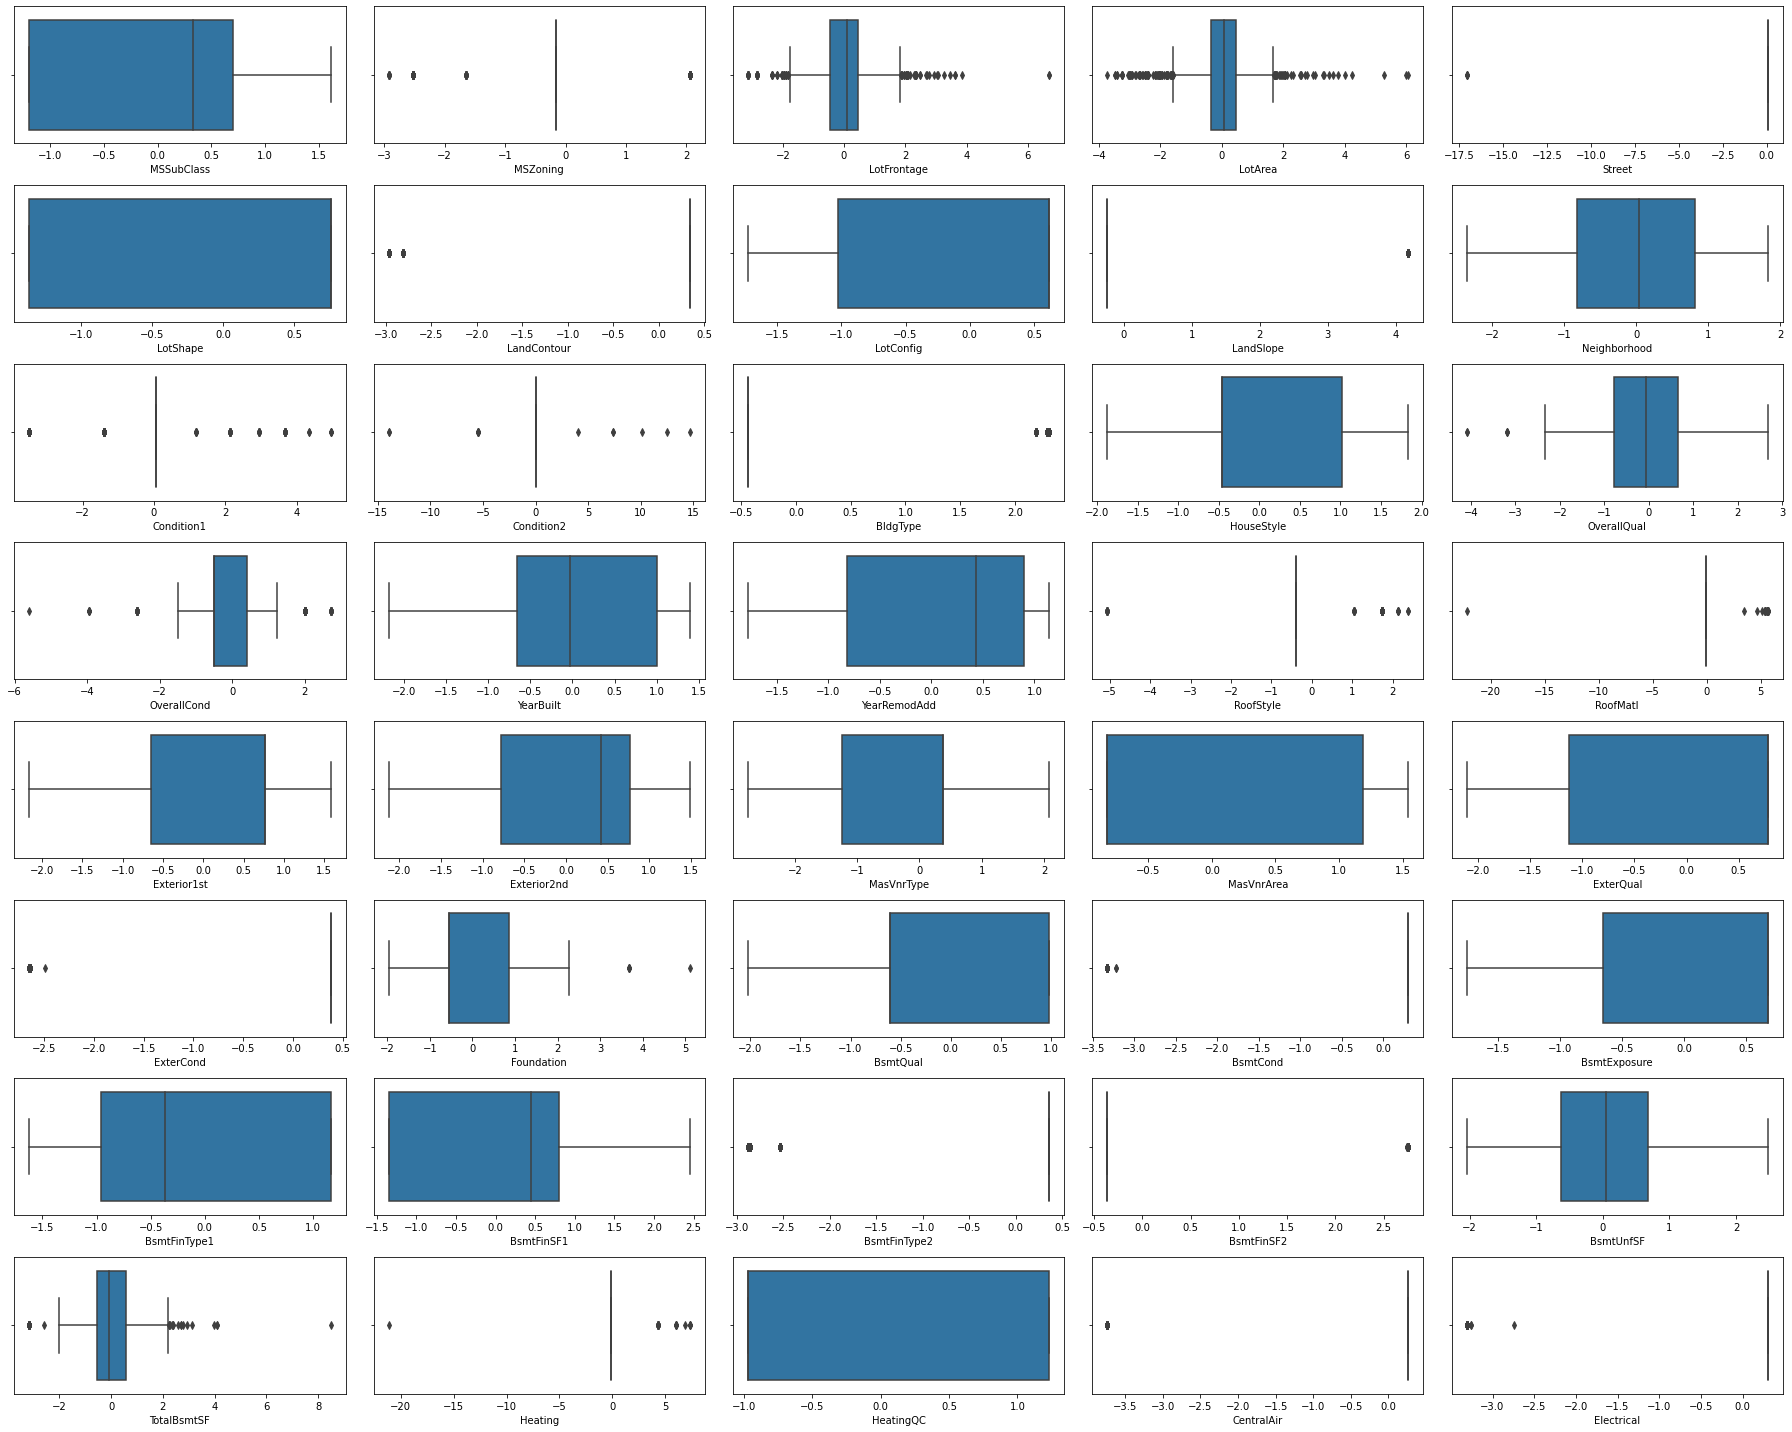

In [70]:
plt.figure(figsize=(25,20))
pn=1
for i in x.iloc[:,0:40]:
    if pn <= 40:
        plt.subplot(8,5,pn)
        sns.boxplot(x[i])
        plt.xlabel(i, fontsize=10)
    pn+=1

plt.tight_layout()

### Most of the feature has categorical values, those column which has continuous values has some outliers. These features are - Lotfrontage, Lotarea and totalbsmtSF. As the most of the column do not has outliers. So, I am not goinng to remove any outlier as I already have small dataset in terms of rows.

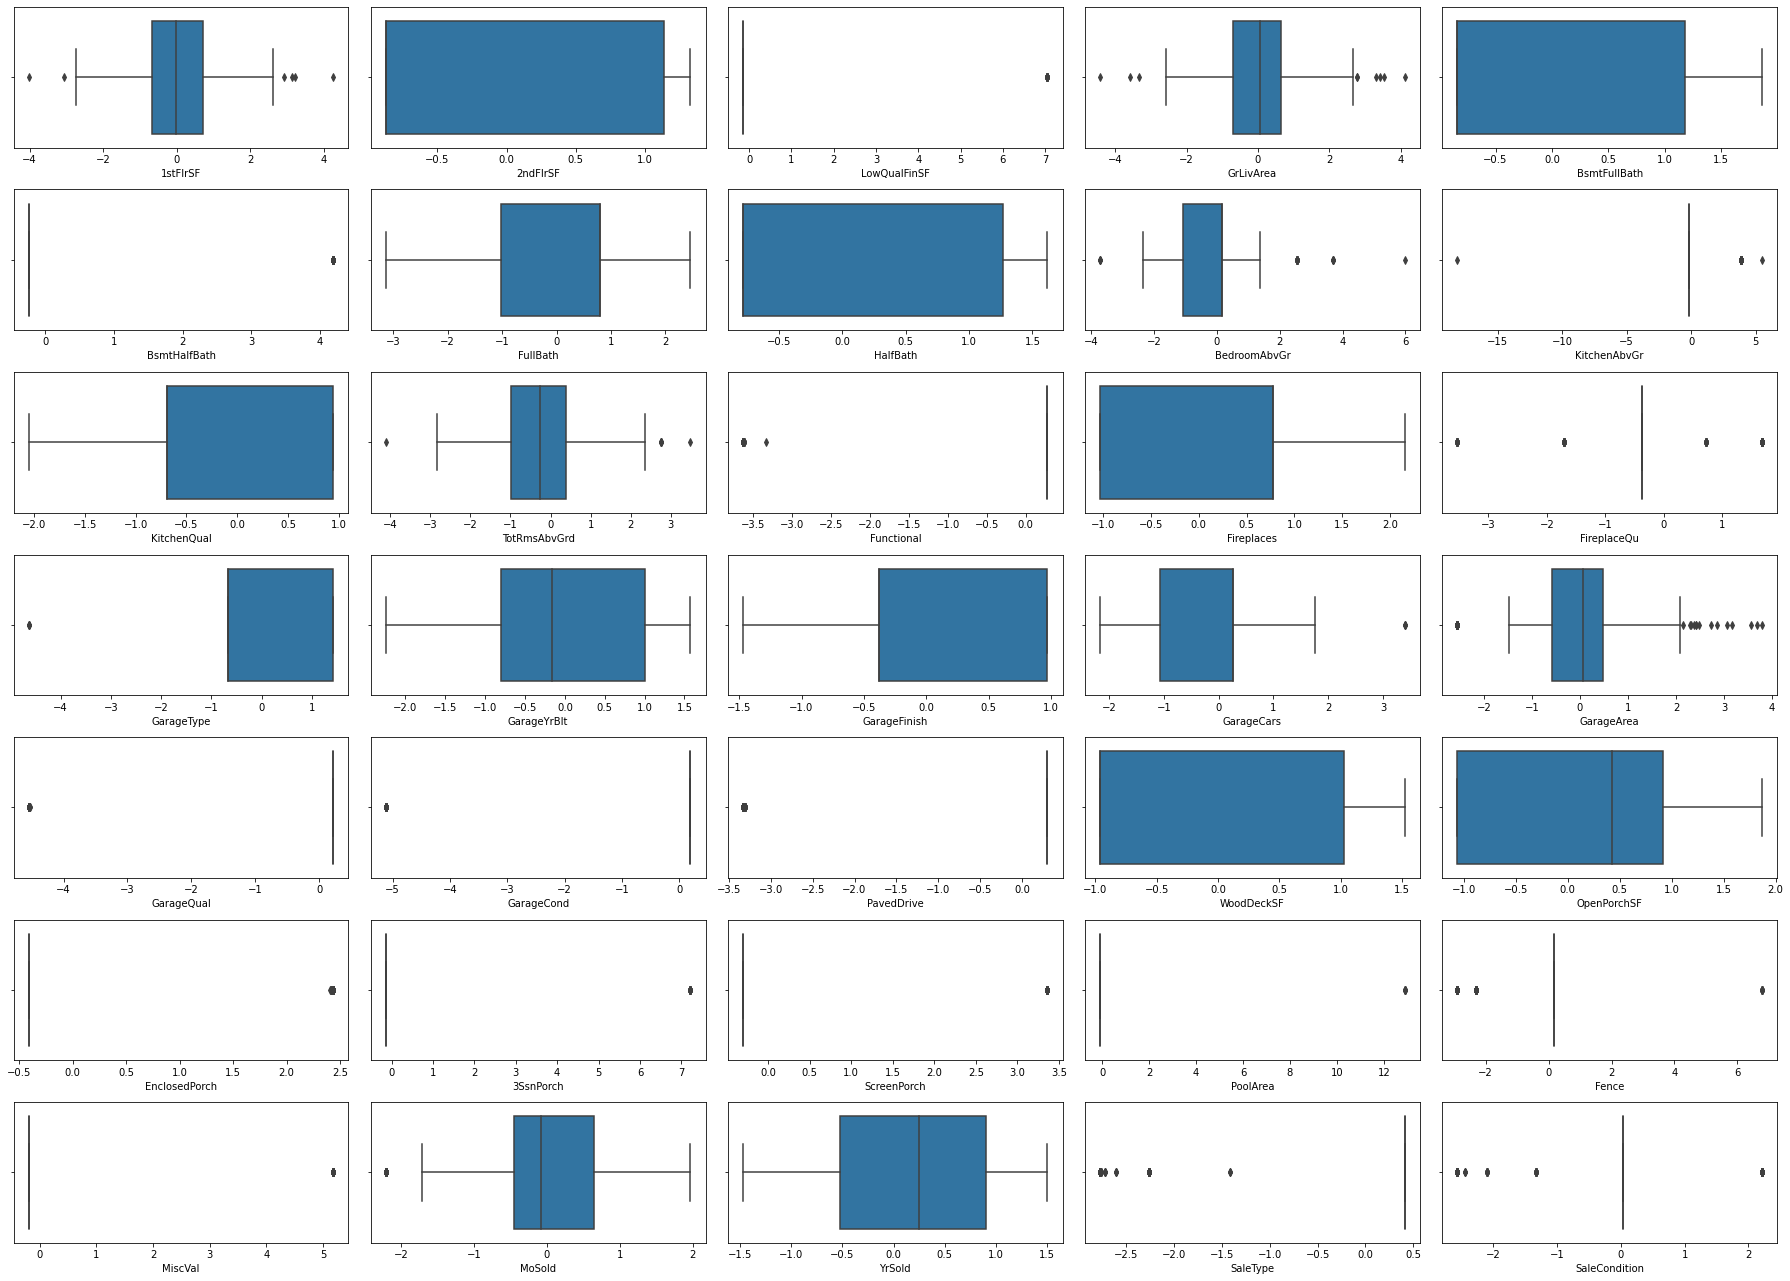

In [71]:
plt.figure(figsize=(25,20))
pn=1
for i in x.iloc[:,40:80]:
    if pn <= 40:
        plt.subplot(8,5,pn)
        sns.boxplot(x[i])
        plt.xlabel(i, fontsize=10)
    pn+=1

plt.tight_layout()

### Most of the feature has categorical values, those column which has continuous values has some outliers. These features are - Garagearea, Glrarea and 1stFr. As the most of the column do not has outliers. So, I am not goinng to remove any outlier as I already have small dataset in terms of rows.

### I am set to proceed to build model.

In [72]:
### Scaling the features with standard scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [73]:
#### Splitting the dataset into traing data and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.20, random_state=25)
print(len(x_train), len(y_train), len(x_test), len(y_test))

934 934 234 234


In [74]:
### Importing the libraries for model building.
from sklearn.metrics import r2_score, plot_roc_curve, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [75]:
### Importing the LinearRegression and checking the r2 score, cross validation and errors
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
r2_lr =r2_score(y_test,pred_lr)
scr = cross_val_score(lr, x,y, cv=5)
Corss_lr = scr.mean()
mae_lr = mean_absolute_error(y_test,pred_lr)
mse_lr = mean_squared_error(y_test,pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("\t\t\t LinearRegression Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for LinearRegression model', r2_lr*100, '\n Cross Validation score ', Corss_lr*100, '\nMean_absolute_error', mae_lr,"\nMean_squared_error", mse_lr, '\nRoot mean_squared_error', rmse_lr )

			 LinearRegression Model Accuracy and r2 score, cross validation and errors 

R2 score for LinearRegression model 77.14575232589982 
 Cross Validation score  75.25588157556652 
Mean_absolute_error 24196.9974949045 
Mean_squared_error 1575464546.2098446 
Root mean_squared_error 39692.121966579776


In [76]:
### Importing the GradientBoostingRegressor and checking the r2 score, cross validation and errors
gbr= GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
r2_gbr =r2_score(y_test,pred_gbr)
scr = cross_val_score(gbr, x,y, cv=5)
Corss_gbr = scr.mean()
mae_gbr = mean_absolute_error(y_test,pred_gbr)
mse_gbr= mean_squared_error(y_test,pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gbr*100, '\n Cross Validation score ', Corss_gbr*100, '\nMean_absolute_error', mae_gbr,"\nMean_squared_error", mse_gbr, '\nRoot mean_squared_error', rmse_gbr )

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 87.36553504229497 
 Cross Validation score  86.46731179358028 
Mean_absolute_error 18337.26095410868 
Mean_squared_error 870960702.1434656 
Root mean_squared_error 29512.04334070187


In [77]:
### Importing the KNeighborsRegressor and checking the score and r2 score
KNN= KNeighborsRegressor()
KNN.fit(x_train,y_train)
pred_KNN=KNN.predict(x_test)
r2_KNN =r2_score(y_test,pred_KNN)
scr = cross_val_score(KNN, x_scaled,y, cv=5)
Corss_KNN = scr.mean()
mae_KNN = mean_absolute_error(y_test,pred_KNN)
mse_KNN = mean_squared_error(y_test,pred_KNN)
rmse_KNN = np.sqrt(mse_KNN)

print("\t\t\t KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for KNeighborsRegressor model', r2_KNN*100, '\n Cross Validation score ', Corss_KNN*100, '\nMean_absolute_error', mae_KNN,"\nMean_squared_error", mse_KNN, '\nRoot mean_squared_error', rmse_KNN)

			 KNeighborsRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for KNeighborsRegressor model 69.68682655937687 
 Cross Validation score  73.52484128700374 
Mean_absolute_error 27042.81282051282 
Mean_squared_error 2089647872.8955555 
Root mean_squared_error 45712.66643825927


In [78]:
### Importing the BayesianRidge and checking the score and r2 score
br= BayesianRidge()
br.fit(x_train,y_train)
pred_br=br.predict(x_test)
r2_br =r2_score(y_test,pred_br)
scr = cross_val_score(br, x,y, cv=5)
Corss_br = scr.mean()
mae_br = mean_absolute_error(y_test,pred_br)
mse_br= mean_squared_error(y_test,pred_br)
rmse_br= np.sqrt(mse_br)

print("\t\t\t BayesianRidge Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for BayesianRidge model', r2_br*100, '\n Cross Validation score ', Corss_br*100, '\nMean_absolute_error', mae_br,"\nMean_squared_error", mse_br, '\nRoot mean_squared_error', rmse_br)

			 BayesianRidge Model Accuracy and r2 score, cross validation and errors 

R2 score for BayesianRidge model 77.4441432894999 
 Cross Validation score  76.82350780220429 
Mean_absolute_error 23634.54468927639 
Mean_squared_error 1554894873.9648864 
Root mean_squared_error 39432.155329944704


In [79]:
### Importing the SupportVectorRegressor and checking the score and r2 score
svr= SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
r2_svr=r2_score(y_test,pred_svr)
scr = cross_val_score(svr, x,y, cv=5)
Corss_svr = scr.mean()
mae_svr = mean_absolute_error(y_test,pred_svr)
mse_svr = mean_squared_error(y_test,pred_svr)
rmse_svr = np.sqrt(mse_svr)
print("\t\t\t SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for SupportVectorRegressor model', r2_svr*100, '\n Cross Validation score -', Corss_svr*100, '\nMean_absolute_error', mae_svr,"\nMean_squared_error", mse_svr, '\nRoot mean_squared_error', rmse_svr)

			 SupportVectorRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for SupportVectorRegressor model -4.66615632648697 
 Cross Validation score - -6.175451883812504 
Mean_absolute_error 56623.56159388494 
Mean_squared_error 7215193465.646636 
Root mean_squared_error 84942.29491629383


In [80]:
### Importing the RandomForestRegressor and checking the score and r2 score
RFR= RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
r2_RFR =r2_score(y_test,pred_RFR)
scr = cross_val_score(RFR, x_scaled,y, cv=5)
Corss_RFR = scr.mean()
mae_RFR = mean_absolute_error(y_test,pred_RFR)
mse_RFR = mean_squared_error(y_test,pred_RFR)
rmse_RFR = np.sqrt(mse_RFR)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_RFR*100, '\n Cross Validation score ', Corss_RFR*100, '\nMean_absolute_error', mae_RFR,"\nMean_squared_error", mse_RFR, '\nRoot mean_squared_error', rmse_RFR )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 84.97204483515141 
 Cross Validation score  84.19340782456072 
Mean_absolute_error 19695.471282051287 
Mean_squared_error 1035956680.870365 
Root mean_squared_error 32186.280941891455


### I performed 6 model prediction Model Accuracy and r2 score, cross validation and errors are mentioned below - 

#### Accuracy score and cross validation score for LinearRegression model 77.14 and cross validation score is 75.25  
#### Accuracy score cross validation score for GradientBoostingRegressor model 87.76 and cross validation score is 86.54  
#### Accuracy score cross validation score for RandomForestRegressor model 85.04 and cross validation score is 84.53  
#### Accuracy score cross validation score  for BayesianRidge model 77.44 and cross validation score is 76.82  
#### Accuracy score cross validation score for KNeighborsRegressor model 69.68  and cross validation score is 73.52 
#### Accuracy score cross validation score  for SupportVectorRegressor model -4.66 and cross validation score is -6.175  

### From the above, I conclude that GradientBoostingRegressor is giving good result as compared to other 6 model and RandomForestRegressor is also performing very good. I will do hyperparameter tunning for both model to get increase the accuracy score.


In [81]:
from sklearn.model_selection import GridSearchCV
rr = RandomForestRegressor()
para = {'n_estimators':range(1,5),
       'criterion':["mse", "mae"],
        'max_depth':range(1,10),
    'min_samples_split':range(1,7),
    'min_samples_leaf':range(1,6)}
grid =  GridSearchCV(rr, param_grid=para)
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 7),
                         'n_estimators': range(1, 5)})

In [82]:
grid.best_params_

{'criterion': 'mae',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 4}

In [89]:
### Importing the RandomForestRegressor and checking the score and r2 score
rr = RandomForestRegressor(criterion='mse',max_depth= 15, min_samples_leaf= 6, min_samples_split=6,n_estimators=10)
rr.fit(x_train,y_train)
pred_rr=rr.predict(x_test)
r2_rr=r2_score(y_test,pred_rr)
scr = cross_val_score(rr, x,y, cv=5)
Corss_rr = scr.mean()
mae_rr= mean_absolute_error(y_test,pred_rr)
mse_rr= mean_squared_error(y_test,pred_rr)
rmse_rr= np.sqrt(mse_rr)

print("\t\t\t RandomForestRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for RandomForestRegressor model', r2_rr*100, '\n Cross Validation score ', Corss_rr*100, '\nMean_absolute_error', mae_rr,"\nMean_squared_error", mse_rr, '\nRoot mean_squared_error', rmse_rr )

			 RandomForestRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for RandomForestRegressor model 83.55532301601679 
 Cross Validation score  80.7893947375183 
Mean_absolute_error 20506.83295540149 
Mean_squared_error 1133618832.3319478 
Root mean_squared_error 33669.256486176644


In [90]:
gb = GradientBoostingRegressor()
para = {'n_estimators':range(1,5),
       'criterion':['friedman_mse', 'mse', 'mae'],
        'max_depth':range(1,5),
    'min_samples_split':range(1,5),
    'min_samples_leaf':range(1,6)}
grid_s =  GridSearchCV(gb, param_grid=para)
grid_s.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(1, 5),
                         'n_estimators': range(1, 5)})

In [91]:
grid_s.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 4}

In [116]:
### Importing the RandomForestRegressor and checking the score and r2 score
gb = GradientBoostingRegressor(criterion='mse',max_depth= 2, min_samples_leaf= 3, min_samples_split=5,n_estimators=100)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
r2_gb=r2_score(y_test,pred_gb)
scr = cross_val_score(gb, x,y, cv=5)
Corss_gb = scr.mean()
mae_gb= mean_absolute_error(y_test,pred_gb)
mse_gb= mean_squared_error(y_test,pred_gb)
rmse_gb= np.sqrt(mse_gb)

print("\t\t\t GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors",  '\n\nR2 score for GradientBoostingRegressor model', r2_gb*100, '\n Cross Validation score ', Corss_gb*100, '\nMean_absolute_error', mae_gb,"\nMean_squared_error", mse_gb, '\nRoot mean_squared_error', rmse_gb)

			 GradientBoostingRegressor Model Accuracy and r2 score, cross validation and errors 

R2 score for GradientBoostingRegressor model 83.0313247992396 
 Cross Validation score  83.98197452780964 
Mean_absolute_error 20012.27028563161 
Mean_squared_error 1169740809.5058105 
Root mean_squared_error 34201.47379142908


### Conclusion - I tuned both RandomForestRegressor  and GradientBoostingRegressor but did not get better result compared to untuned models. So, I will keep untuned model and proceed further with GradientBoostingRegressor.

In [ ]:
## Saving the model

In [117]:
import joblib
joblib.dump(gbr, 'Flight_price_prediction')

['Flight_price_prediction']

## Now going to predict the SalePrice for test dataset. 

In [118]:
### Importing the test_dataset
test_data= pd.read_csv(r'C:\Users\DELL\Downloads\Project-Housing_splitted\test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [119]:
test_data.shape

(292, 80)

In [121]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [123]:
### I will drop those column which has null values greater than 90%.
test_data.drop(columns=['MiscFeature','PoolQC','Alley','Id'], inplace=True)

In [126]:
### The test data set also have some null values. I will fill these values.
si = SimpleImputer(strategy="most_frequent")
test_data['MasVnrType']=si.fit_transform(test_data[['MasVnrType']])
test_data['BsmtQual']=si.fit_transform(test_data[['BsmtQual']])
test_data['MasVnrType']=si.fit_transform(test_data[['MasVnrType']])
test_data['BsmtCond']=si.fit_transform(test_data[['BsmtCond']])
test_data['BsmtExposure']=si.fit_transform(test_data[['BsmtExposure']])
test_data['BsmtFinType1']=si.fit_transform(test_data[['BsmtFinType1']])
test_data['BsmtFinType2']=si.fit_transform(test_data[['BsmtFinType2']])
test_data['Electrical']=si.fit_transform(test_data[['Electrical']])     
test_data['FireplaceQu']=si.fit_transform(test_data[['FireplaceQu']])
test_data['GarageType']=si.fit_transform(test_data[['GarageType']])
test_data['GarageFinish']=si.fit_transform(test_data[['GarageFinish']])
test_data['GarageYrBlt']=si.fit_transform(test_data[['GarageYrBlt']])
test_data['GarageQual']=si.fit_transform(test_data[['GarageQual']])
test_data['GarageCond']=si.fit_transform(test_data[['GarageCond']])
test_data['Fence']=si.fit_transform(test_data[['Fence']])

In [127]:
si= SimpleImputer(strategy='mean')
test_data['LotFrontage']=si.fit_transform(test_data[['LotFrontage']])
test_data['GarageYrBlt']=si.fit_transform(test_data[['GarageYrBlt']])
test_data['MasVnrArea']=si.fit_transform(test_data[['MasVnrArea']])

In [128]:
### Now checking the data shape for test data and train data
print(test_data.shape, x.shape)

(292, 76) (1168, 75)


In [129]:
### There is one column in the dataset which is Utilities, which I need to remove as Utilities have same values for all the features
test_data.drop(columns='Utilities', inplace=True)

In [131]:
#### Changing the Categorical values to integers with LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
col=['MSSubClass','MSZoning','Street','LotShape', 'LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence', 'SaleType','SaleCondition','YrSold','YearRemodAdd','YearBuilt']
test_data[col]= test_data[col].apply(le.fit_transform)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,2,86.000000,14157,1,0,1,0,0,21,2,0,0,2,9,5,79,52,3,0,9,11,3,200.0,2,3,2,0,2,1,2,1249,5,0,673,1922,0,0,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,5,1,2,1,2005.0,0,3,676,4,4,2,178,51,0,0,0,0,2,0,7,1,5,2
1,11,2,66.425101,5814,1,0,3,1,0,21,2,0,4,2,8,5,60,31,1,0,5,5,2,0.0,2,3,1,2,2,0,2,1036,5,0,184,1220,0,2,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,5,1,0,1,1984.0,1,2,565,4,4,2,63,0,0,0,0,0,2,0,8,3,0,0
2,0,2,66.425101,11838,1,3,3,4,0,4,2,0,0,2,8,5,75,47,3,0,9,11,2,0.0,2,3,2,2,2,0,5,0,5,0,1753,1753,0,0,1,3,1788,0,0,1788,0,0,2,0,3,1,0,7,5,1,4,1,2001.0,1,2,522,4,4,2,202,151,0,0,0,0,2,0,6,3,5,2
3,6,2,75.000000,12000,1,3,0,4,0,5,2,0,0,5,7,7,25,0,1,0,6,7,2,0.0,3,3,1,3,2,3,4,275,5,0,429,704,0,0,1,3,860,704,0,1564,0,0,1,1,3,1,1,7,5,1,2,1,1941.0,2,1,234,4,4,2,0,0,0,0,0,0,2,0,7,3,5,2
4,5,2,86.000000,14598,1,0,3,1,0,20,1,0,0,5,6,5,81,53,1,0,9,11,3,74.0,2,3,2,2,2,2,5,0,5,0,894,894,0,0,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,5,1,2,3,2007.0,0,3,668,4,4,2,100,18,0,0,0,0,2,0,1,2,5,2


In [132]:
test_data_prediction =gbr.predict(test_data)

In [133]:
test_data_prediction

array([484694.91461188, 437982.42186196, 451273.1072196 , 492474.85176149,
       503799.68496442, 429173.94179439, 453415.74094271, 489733.50298195,
       439952.10196806, 488703.14129144, 412532.23725621, 441546.17656114,
       453231.95900493, 519195.91862373, 471512.88942063, 502208.3234901 ,
       479369.62981698, 478793.19544309, 530174.81695509, 504130.52111421,
       517145.91270313, 474043.34139616, 448898.89310795, 447576.22470811,
       449310.84090565, 438753.31611468, 483320.95448699, 460881.27960559,
       542859.52878936, 416111.5370722 , 457516.95190749, 489733.50298195,
       460902.65015725, 510097.94492049, 409043.4375554 , 480113.75613356,
       524143.51858008, 484155.16783753, 513326.35062804, 500457.58974922,
       449625.94871941, 530174.81695509, 463506.67167193, 466933.94853226,
       477053.28509059, 506947.75566631, 438751.76874552, 452201.59731441,
       483664.55292136, 485404.01393622, 514236.93984297, 414625.57331581,
       471569.97030749, 4

In [135]:
## As the predicted result has too multiple digits after the decimal. To make this predicted value easy, I will round off this.
df_predict=pd.DataFrame({"Predicted House Price":list(np.round(test_data_prediction))})
df_predict.head(10)

,Predicted House Price
0,484695.0
1,437982.0
2,451273.0
3,492475.0
4,503800.0
5,429174.0
6,453416.0
7,489734.0
8,439952.0
9,488703.0


In [136]:
### Let's save this prediction into the excel file.
df_predict.to_excel('Predicted House Price.xlsx')